In [ ]:
# Kaggle New York City Taxi Trip Duration

In [ ]:
# https://www.kaggle.com/c/nyc-taxi-trip-duration
# https://www.kaggle.com/juan1393/nyc-taxi-data-analysis

In [ ]:
!unzip data/train.zip

In [27]:
!pip install numpy pandas matplotlib seaborn sklearn haversine

You are using pip version 19.0.1, however version 19.2.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv("data/train.csv")

# Delete locations far away from the others
longitude_limit = [-74.027, -73.85]
latitude_limit = [40.67, 40.85]
df = df[(df.pickup_longitude.between(longitude_limit[0], longitude_limit[1], inclusive=False))]
df = df[(df.dropoff_longitude.between(longitude_limit[0], longitude_limit[1], inclusive=False))]
df = df[(df.pickup_latitude.between(latitude_limit[0], latitude_limit[1], inclusive=False))]
df = df[(df.dropoff_latitude.between(latitude_limit[0], latitude_limit[1], inclusive=False))]
df["pickup_datetime"] = pd.to_datetime(df["pickup_datetime"])
df["dropoff_datetime"] = pd.to_datetime(df["dropoff_datetime"])

# df
df.shape

(1380673, 11)

In [22]:
# Sampling

In [35]:
ROWS_SAMPLE = 8000
df_trimmed = df.sample(ROWS_SAMPLE)
df_trimmed.shape

(8000, 11)

In [36]:
df_trimmed.info()
df_trimmed.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8000 entries, 1150504 to 942637
Data columns (total 11 columns):
id                    8000 non-null object
vendor_id             8000 non-null int64
pickup_datetime       8000 non-null datetime64[ns]
dropoff_datetime      8000 non-null datetime64[ns]
passenger_count       8000 non-null int64
pickup_longitude      8000 non-null float64
pickup_latitude       8000 non-null float64
dropoff_longitude     8000 non-null float64
dropoff_latitude      8000 non-null float64
store_and_fwd_flag    8000 non-null object
trip_duration         8000 non-null int64
dtypes: datetime64[ns](2), float64(4), int64(3), object(2)
memory usage: 750.0+ KB


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
1150504,id3649421,1,2016-03-06 01:44:09,2016-03-06 01:49:19,1,-74.016060,40.714878,-74.012733,40.707687,N,310
985445,id0164754,2,2016-05-12 20:52:19,2016-05-12 20:57:56,5,-73.978485,40.745209,-73.968239,40.755535,N,337
1401026,id3477855,1,2016-01-02 19:35:40,2016-01-02 19:40:20,4,-73.974495,40.783096,-73.957954,40.784729,N,280
159448,id0707610,1,2016-04-04 18:46:27,2016-04-04 18:53:38,1,-73.973717,40.747829,-73.985863,40.731102,N,431
545434,id2703419,2,2016-03-05 20:09:58,2016-03-05 20:23:19,1,-73.975739,40.752426,-73.987724,40.765305,N,801


In [37]:
# sample data EDA

In [38]:
# 출도착지위경도 분포

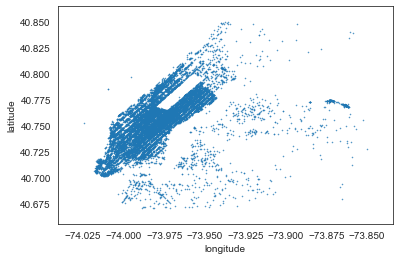

In [39]:
longitude = list(df_trimmed.pickup_longitude) + list(df_trimmed.dropoff_longitude)
latitude = list(df_trimmed.pickup_latitude) + list(df_trimmed.dropoff_latitude)

data = pd.DataFrame({'latitude': latitude, 'longitude': longitude})
sns.set_style("white")
ax = sns.regplot(
    x="longitude", 
    y="latitude", 
    data=data, 
    scatter=True, 
    fit_reg=False, 
    scatter_kws={"s": 0.3}
)
plt.show()

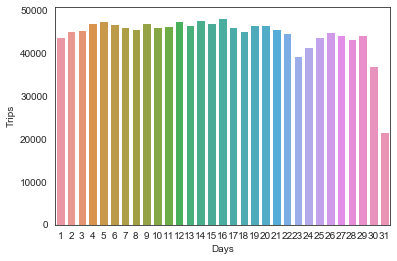

In [40]:
ax = sns.countplot(df.pickup_datetime.dt.day)
ax.set(xlabel='Days', ylabel='Trips')
plt.show()

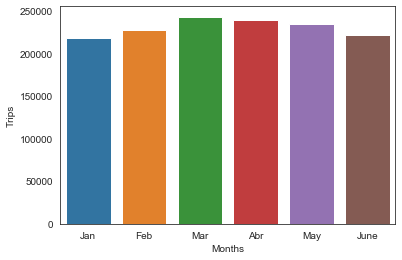

In [41]:
ax = sns.countplot(df.pickup_datetime.dt.month)
ax.set(xlabel='Months', ylabel='Trips', xticklabels=['Jan', 'Feb', 'Mar', 'Abr', 'May', 'June'])
plt.show()

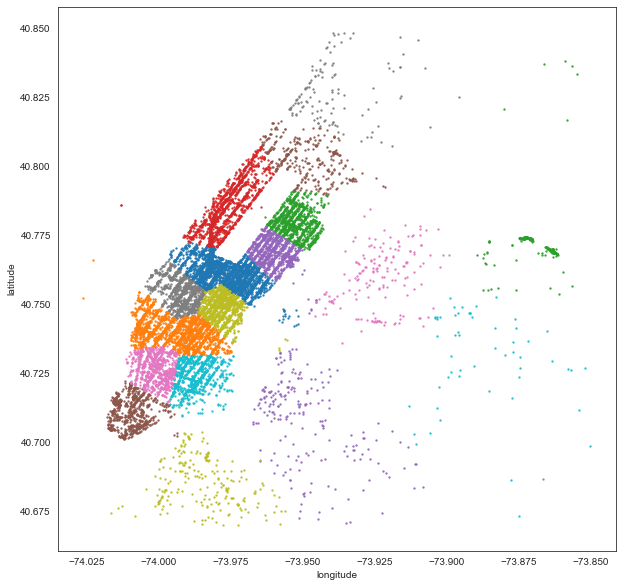

In [24]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=20, random_state=0).fit(data)
data['kmean_label'] = kmeans.labels_

plt.figure(figsize=(10, 10))
for label in data.kmean_label.unique():
    label_data = pd.DataFrame({'latitude': data.latitude[data.kmean_label == label], 'longitude': data.longitude[data.kmean_label == label]})
    sns.regplot(x="longitude", y="latitude", data=label_data, scatter=True, fit_reg=False, scatter_kws={"s": 2})

plt.show()

/Users/torres.woo/.pyenv/versions/3.6.5/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


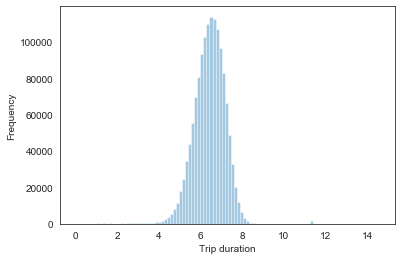

In [25]:
df.log_trip_duration = np.log(df.trip_duration)
ax = sns.distplot(df.log_trip_duration, bins=100, kde=False)
plt.xlabel('Trip duration')
plt.ylabel('Frequency')
plt.show()

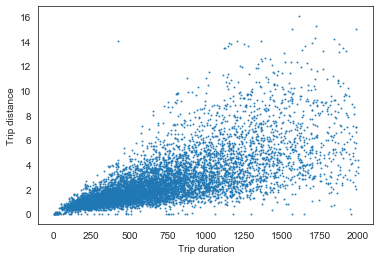

In [28]:
from haversine import haversine
df_trimmed['trip_distance'] = [haversine((row['pickup_latitude'], row['pickup_longitude']), (row['dropoff_latitude'], row['dropoff_longitude'])) for index, row in df_trimmed.iterrows()]

# Remove trip with high duration
MAX_TRIP_DURATION = 2000
df_trimmed_duration = df_trimmed[(df_trimmed.trip_duration < MAX_TRIP_DURATION)]

ax = sns.regplot(x="trip_duration", y="trip_distance", data=df_trimmed_duration, scatter=True, fit_reg=False, scatter_kws={"s": 1})
ax.set(xlabel='Trip duration', ylabel='Trip distance')
plt.show()